<a href="https://colab.research.google.com/github/OlhaDot/Lesson8_GitTask/blob/master/STRESS_TEST_AVAL_as_of_31_12_2023%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [125]:
url = 'https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/StressTestAval/input_data.csv'
data = pd.read_csv(url, sep=';')
print(data.head())


       data  GDP  Unemployment  Inflation  add1  add2        DR
0  20120331  2.4           9.8   2.863995   NaN   NaN  0.059238
1  20120630  3.0           9.2  -0.369418   NaN   NaN  0.063927
2  20120930 -1.3           8.7  -0.033344   NaN   NaN  0.065745
3  20121231 -2.4           8.8  -0.133378   NaN   NaN  0.066180
4  20120331 -1.3           9.5  -0.500302   NaN   NaN  0.099236


In [126]:
data2 = data.copy()
data2.drop('data', axis=1, inplace=True)

In [127]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GDP           96 non-null     float64
 1   Unemployment  96 non-null     float64
 2   Inflation     96 non-null     float64
 3   add1          0 non-null      float64
 4   add2          0 non-null      float64
 5   DR            96 non-null     float64
dtypes: float64(6)
memory usage: 4.6 KB


(array([ 3.,  5.,  5., 19.,  5.,  5.,  9.,  8.,  4.,  2.,  4.,  2.,  4.,
         0.,  1.,  2.,  2.,  1.,  0.,  0.,  1.,  2.,  4.,  1.,  1.,  2.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.]),
 array([0.01222617, 0.02048231, 0.02873844, 0.03699458, 0.04525071,
        0.05350685, 0.06176298, 0.07001912, 0.07827526, 0.08653139,
        0.09478753, 0.10304366, 0.1112998 , 0.11955593, 0.12781207,
        0.1360682 , 0.14432434, 0.15258047, 0.16083661, 0.16909274,
        0.17734888, 0.18560501, 0.19386115, 0.20211728, 0.21037342,
        0.21862956, 0.22688569, 0.23514183, 0.24339796, 0.2516541 ,
        0.25991023, 0.26816637, 0.2764225 , 0.28467864, 0.29293477,
        0.30119091, 0.30944704, 0.31770318, 0.32595931, 0.33421545,
        0.34247159]),
 <BarContainer object of 40 artists>)

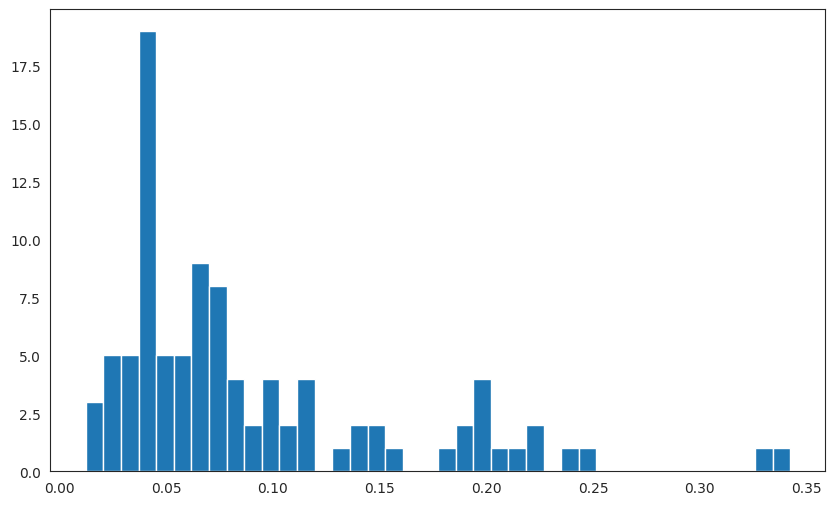

In [128]:
plt.figure(figsize = (10,6))
plt.hist(data2['DR'], bins = 40)

In [129]:
data2.describe()

,GDP,Unemployment,Inflation,add1,add2,DR
count,96.000000,96.000000,96.000000,0.0,0.0,96.000000
mean,-2.771875,9.314792,6.818860,NaN,NaN,0.090590
std,3.629912,0.498186,10.059747,NaN,NaN,0.068718
min,-16.000000,7.600000,-0.500302,NaN,NaN,0.012226
25%,-3.932500,9.207500,3.317500,NaN,NaN,0.042284
50%,-3.695000,9.405000,3.555000,NaN,NaN,0.067024
75%,-1.300000,9.600000,3.792500,NaN,NaN,0.113374
max,4.700000,10.500000,58.926844,NaN,NaN,0.342472


CORRELATIONS

In [130]:
data.corr()

,data,GDP,Unemployment,Inflation,add1,add2,DR
data,1.000000,-0.293401,0.253081,-0.380295,NaN,NaN,-0.167761
GDP,-0.293401,1.000000,0.463746,-0.257266,NaN,NaN,0.476377
Unemployment,0.253081,0.463746,1.000000,-0.492793,NaN,NaN,0.115805
Inflation,-0.380295,-0.257266,-0.492793,1.000000,NaN,NaN,0.203940
add1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
add2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DR,-0.167761,0.476377,0.115805,0.203940,NaN,NaN,1.000000


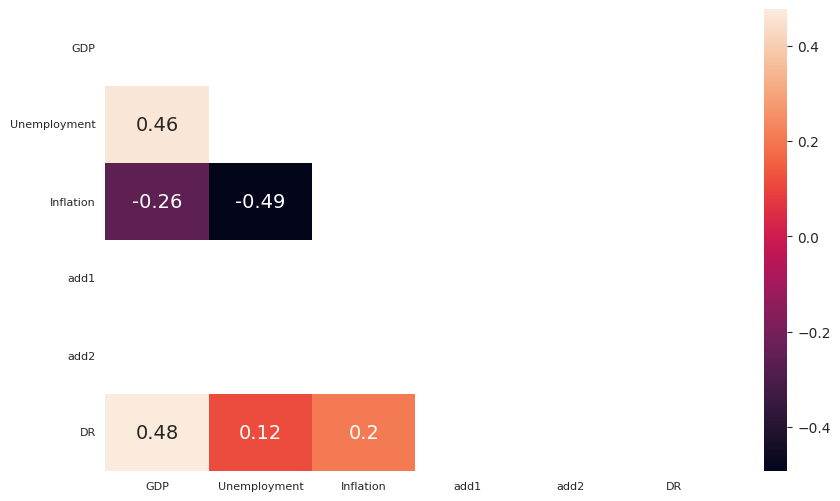

In [132]:
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(data2.corr(), dtype=bool))
sns.heatmap(data2.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

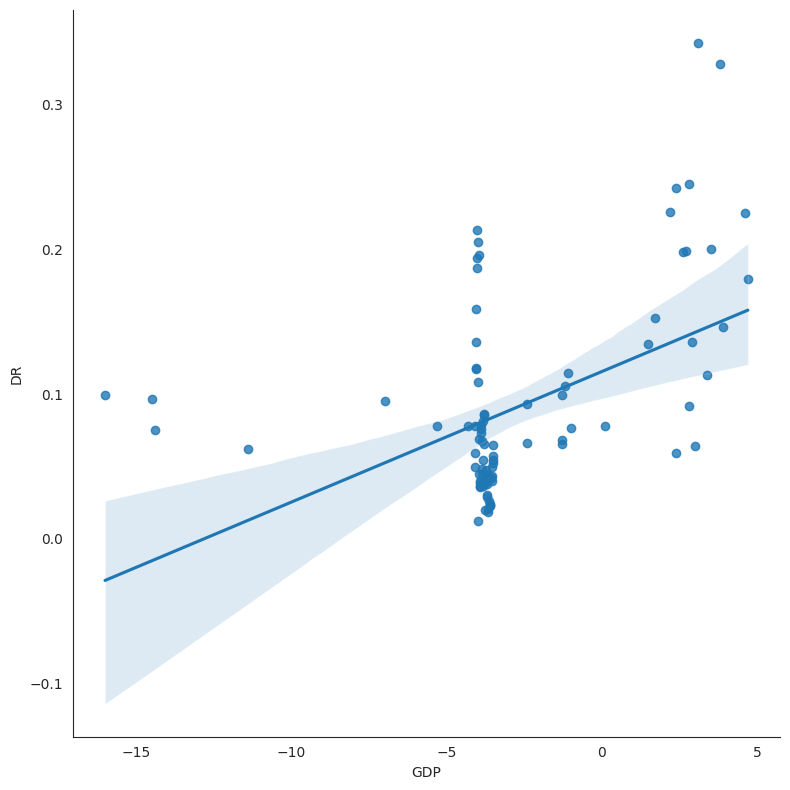

In [133]:
sns.lmplot(x='GDP', y='DR', data=data2, height=8)
plt.show()

In [137]:
# origin model
DR_orign = data2["DR"]
macroparam = data2.drop(['DR', 'add1', 'add2'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(macroparam, DR_orign, test_size=0.2, random_state=0)

# model train
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

print('Training data r-squared:', LinReg.score(X_train, y_train))
print('Test data r-squared:', LinReg.score(X_test, y_test))

Training data r-squared: 0.3127018663523695
Test data r-squared: 0.36397174446287706


In [140]:
# P-value
model = sm.OLS(y_train, X_train)
results = model.fit()

pd.DataFrame({'coef': results.params, 'P_value': round(results.pvalues,3)})
# P-value shoul be < 0.05 - then ok, other parameters must be excluded

,coef,P_value
GDP,0.009239,0.000
Unemployment,0.010475,0.000
Inflation,0.002514,0.001


TRAINING PART

In [75]:
# pay attention what you are dropping
DR = data2["DR"]
macro = data2.drop(['DR', 'add1', 'add2'], axis = 1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(macro, DR, test_size=0.2, random_state=0)

In [77]:
# model train
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [78]:
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept:', regr.intercept_)
pd.DataFrame(data = regr.coef_, index = X_train.columns, columns = ['coef'])

Training data r-squared: 0.3127018663523695
Test data r-squared: 0.36397174446287706
Intercept: 0.15277532058806859


,coef
GDP,0.010191
Unemployment,-0.005321
Inflation,0.002081


In [79]:
data2['DR'].skew()

1.5568710448465064

In [80]:
data2['DR'].min()

0.012226173

In [81]:
y_log = np.log(data2['DR'])
y_log.tail()


91   -2.135044
92   -2.145182
93   -2.550838
94   -2.822807
95   -3.003101
Name: DR, dtype: float64

In [82]:
y_log.skew()

0.15158748338311348

<ipython-input-83-8228d1824536>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_log)


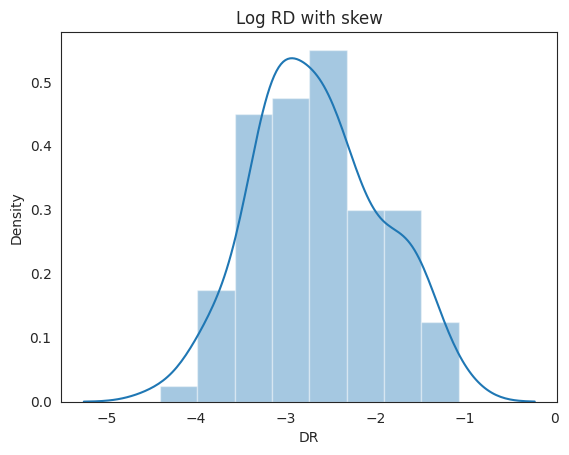

In [83]:
sns.distplot(y_log)
plt.title('Log RD with skew')
plt.show()

REGRETION USING log DR

In [124]:
DR_log = np.log(data2['DR'])
macros = data2.drop(['DR', 'add1', 'add2'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(macros, DR_log, test_size=0.2, random_state=0)

regr2 = LinearRegression()
regr2.fit(X_train, y_train)


print('Training data r-squared:', regr2.score(X_train, y_train))
print('Test data r-squared:', regr2.score(X_test, y_test))

print('Intercept:', regr2.intercept_)
pd.DataFrame(data = regr2.coef_, index = X_train.columns, columns = ['coef'])

Training data r-squared: 0.2767114075338426
Test data r-squared: 0.33586708706628454
Intercept: -0.34625568752173397


,coef
GDP,0.102417
Unemployment,-0.229302
Inflation,0.018946


**What we can drop to make better model score**

In [99]:
# P-value
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'P_value': round(results.pvalues,3)})
# P-value shoul be < 0.05 - then ok, other parameters must be excluded

,coef,P_value
const,-0.346256,0.834
GDP,0.102417,0.000
Unemployment,-0.229302,0.182
Inflation,0.018946,0.035


In [101]:
# VIF - multicollinearity - should be less as possible < 5/10
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': np.round(vif, 2)})

,coef_name,vif
0,const,636.36
1,GDP,1.29
2,Unemployment,1.74
3,Inflation,1.42


In [ ]:
# BIC -less BIC - better

In [118]:
#  Original model or LOG model - to decide
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
result = model.fit()

orign_coef = pd.DataFrame({'coef_name': result.params, 'p-value': np.round(results.pvalues, 3)})

print('BIC is:', results.bic)
print('r-squared:', results.rsquared)

BIC is: 142.73050847535387
r-squared: 0.2767114075338425


In [116]:
#  Original model or LOG model - to decide  WO Unemployment
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['Unemployment'], axis = 1)

model2 = sm.OLS(y_train, X_incl_const)
result2 = model2.fit()

orign_coef_wo_Unempl = pd.DataFrame({'coef_name': result2.params, 'p-value': round(result2.pvalues, 3)})

print('BIC is:', result2.bic)
print('r-squared:', result2.rsquared)

BIC is: 140.2964305007933
r-squared: 0.25843390545679423


In [117]:
#  Original model or LOG model - to decide  WO Unemployment+ Inflation
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['Unemployment', 'Inflation'], axis = 1)

model3 = sm.OLS(y_train, X_incl_const)
result3 = model3.fit()

orign_coef_wo_Unempl_Infl = pd.DataFrame({'coef_name': result3.params, 'p-value': round(result3.pvalues, 3)})

print('BIC is:', result3.bic)
print('r-squared:', result3.rsquared)

BIC is: 146.47993239844945
r-squared: 0.14840633472723896


In [120]:
#  Original model - to decide  WO Unemployment
model_org = sm.OLS(y_train, X_train)
result_org = model_org.fit()

orign_coef= pd.DataFrame({'coef_name': result_org.params, 'p-value': round(result_org.pvalues, 3)})

print('BIC is:', result_org.bic)
print('r-squared:', result_org.rsquared)

BIC is: 138.44672290175077
r-squared: 0.9590786211677362


In [121]:
#  Original model - to decide  WO Unemployment
X_train = X_train.drop(['Unemployment'], axis = 1)

model_org = sm.OLS(y_train, X_train)
result_org = model_org.fit()

orign_coef= pd.DataFrame({'coef_name': result_org.params, 'p-value': round(result_org.pvalues, 3)})

print('BIC is:', result_org.bic)
print('r-squared:', result_org.rsquared)

BIC is: 320.43868093154504
r-squared: 0.5250227080591805


In [122]:
#  Original model - to decide  WO Inflation
X_train = X_train.drop(['Inflation'], axis = 1)

model_org = sm.OLS(y_train, X_train)
result_org = model_org.fit()

orign_coef= pd.DataFrame({'coef_name': result_org.params, 'p-value': round(result_org.pvalues, 3)})

print('BIC is:', result_org.bic)
print('r-squared:', result_org.rsquared)

BIC is: 321.6073651793936
r-squared: 0.489378937630776


**NEW VARIANT**

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from datetime import datetime

In [127]:
url = 'https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/StressTestAval/input_data.csv'
data = pd.read_csv(url, sep=';')
print(data.head())


       data  GDP  Unemployment  Inflation  add1  add2        DR
0  20120331  2.4           9.8   2.863995   NaN   NaN  0.059238
1  20120630  3.0           9.2  -0.369418   NaN   NaN  0.063927
2  20120930 -1.3           8.7  -0.033344   NaN   NaN  0.065745
3  20121231 -2.4           8.8  -0.133378   NaN   NaN  0.066180
4  20120331 -1.3           9.5  -0.500302   NaN   NaN  0.099236


In [5]:
# data2 = data.copy()
# data2.drop(['data', 'add1', 'add2'], axis=1, inplace=True)

In [99]:
# data.drop(['data'], axis=1, inplace=True)
# data

,GDP,Unemployment,Inflation,add1,add2,DR,hist_dat
0,2.40,9.80,2.863995,NaN,NaN,0.059238,31-03-2012
1,3.00,9.20,-0.369418,NaN,NaN,0.063927,30-06-2012
2,-1.30,8.70,-0.033344,NaN,NaN,0.065745,30-09-2012
3,-2.40,8.80,-0.133378,NaN,NaN,0.066180,31-12-2012
4,-1.30,9.50,-0.500302,NaN,NaN,0.099236,31-03-2012
...,...,...,...,...,...,...,...
91,-4.06,9.22,3.240000,NaN,NaN,0.118239,31-12-2023
92,-4.07,9.21,3.230000,NaN,NaN,0.117047,31-03-2023
93,-4.08,9.20,3.220000,NaN,NaN,0.078016,30-06-2023
94,-4.09,9.19,3.210000,NaN,NaN,0.059439,30-09-2023


In [128]:
data2 = data.copy()
data2.drop([ 'add1', 'add2'], axis=1, inplace=True)

In [129]:
data2.describe()

,data,GDP,Unemployment,Inflation,DR
count,9.600000e+01,96.000000,96.000000,96.000000,96.000000
mean,2.017578e+07,-2.771875,9.314792,6.818860,0.090590
std,3.470337e+04,3.629912,0.498186,10.059747,0.068718
min,2.012033e+07,-16.000000,7.600000,-0.500302,0.012226
25%,2.014806e+07,-3.932500,9.207500,3.317500,0.042284
50%,2.017578e+07,-3.695000,9.405000,3.555000,0.067024
75%,2.020351e+07,-1.300000,9.600000,3.792500,0.113374
max,2.023123e+07,4.700000,10.500000,58.926844,0.342472


In [130]:
data2.corr()

,data,GDP,Unemployment,Inflation,DR
data,1.000000,-0.293401,0.253081,-0.380295,-0.167761
GDP,-0.293401,1.000000,0.463746,-0.257266,0.476377
Unemployment,0.253081,0.463746,1.000000,-0.492793,0.115805
Inflation,-0.380295,-0.257266,-0.492793,1.000000,0.203940
DR,-0.167761,0.476377,0.115805,0.203940,1.000000


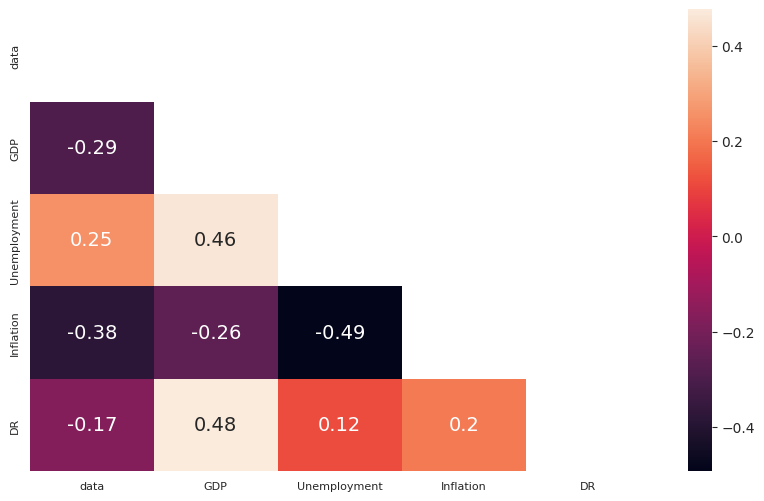

In [131]:
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(data2.corr(), dtype=bool))
sns.heatmap(data2.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [134]:
# model determination
DR = data2["DR"]
macro = data2.drop(['DR'], axis = 1)

macro = sm.add_constant(macro)
regression = sm.OLS(DR, macro)

In [135]:
# model result
result = regression.fit()

pd.DataFrame({'coef': result.params, 'P_value': round(result.pvalues,3)})
# P-value should be < 0.05 - then ok, other parameters must be excluded

,coef,P_value
const,-7.742271e+00,0.067
data,3.904690e-07,0.065
GDP,1.244978e-02,0.000
Unemployment,-3.324454e-03,0.827
Inflation,2.979957e-03,0.000


In [136]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     DR   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     13.15
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           1.70e-08
Time:                        22:53:26   Log-Likelihood:                 143.25
No. Observations:                  96   AIC:                            -276.5
Df Residuals:                      91   BIC:                            -263.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.7423      4.177     -1.854   

In [137]:
# error - stand dev error
result.bse

const           4.176628e+00
data            2.091472e-07
GDP             2.081800e-03
Unemployment    1.519628e-02
Inflation       7.045490e-04
dtype: float64

In [138]:
# now we can drop variables with p_value > 0.05
X_incl_const = sm.add_constant(macro)
X_incl_const = X_incl_const.drop(['Unemployment'], axis = 1)

In [139]:
# test linear model
LinReg = LinearRegression()
LinReg.fit( X_incl_const, DR)

r_sq = LinReg.score( X_incl_const, DR)
print("coef of determination - v1:", r_sq )


coef of determination - v1: 0.36604635900529325


In [140]:
# test linear model 2 wo corrections
LinReg = LinearRegression()
LinReg.fit( macro, DR)

r_sq = LinReg.score( macro, DR)
print("coef of determination - v2:", r_sq )


coef of determination - v2: 0.36637959642106765


# **RESIDUALS = DIFF BETWEEN INPUT DATA AND MODELLING DATA **

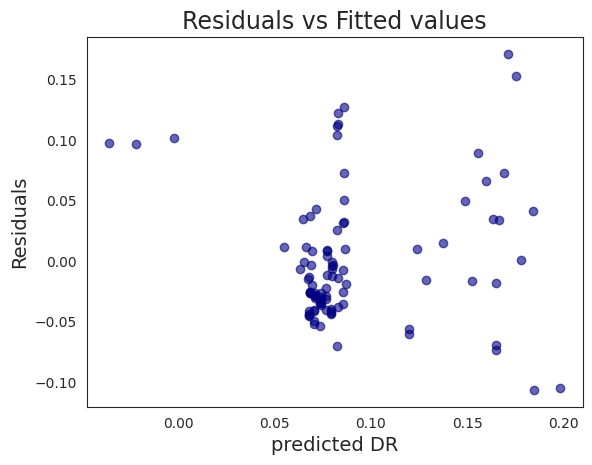

In [141]:
# Residuals vs Predicted level
plt.scatter(x=result.fittedvalues, y =result.resid, c='navy', alpha= 0.6)

plt.xlabel("predicted DR" , fontsize = 14)
plt.ylabel("Residuals" , fontsize = 14)
plt.title("Residuals vs Fitted values" , fontsize = 17)
plt.show()

<ipython-input-142-2a7be3e43912>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result.resid, color = 'navy')


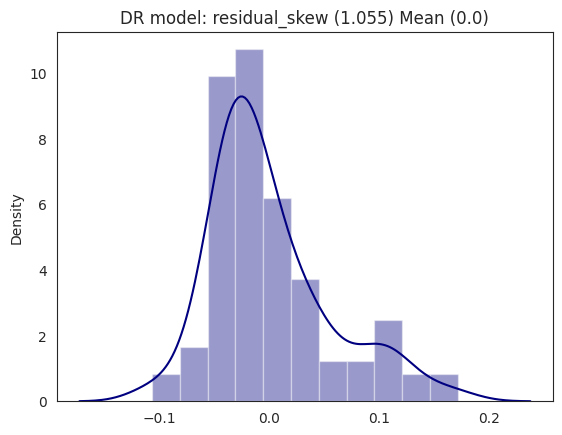

In [142]:
# distribution of residuals
residual_mean = round(result.resid.mean(),3)
residual_skew = round(result.resid.skew(),3)

sns.distplot(result.resid, color = 'navy')
plt.title(f"DR model: residual_skew ({residual_skew}) Mean ({residual_mean})")
plt.show()

# **forecast**

In [143]:
# macro_predicred
# simple LinRegretion
Y_PRED = LinReg.predict(macro)
print("predicted values according to model:",  Y_PRED)

predicted values according to model: [ 0.11992919  0.11987505  0.06912184  0.05491407  0.06483687  0.06839161
  0.07148137  0.12878026  0.08034081  0.06619205  0.06960412 -0.02185189
 -0.00227051  0.08659818  0.16473001  0.19823899  0.18444006  0.13728233
  0.14887259  0.18393058  0.16512507  0.16347402  0.16894309  0.15968021
  0.17118324  0.17510035  0.15560829  0.16659098  0.15263408  0.17801465
  0.16469937  0.12414068  0.08713818 -0.03586276  0.06330701  0.06756203
  0.06539408  0.0680161   0.06930872  0.06860707  0.0710087   0.06864404
  0.06827443  0.06823767  0.06776519  0.06776089  0.06775698  0.06775346
  0.07118567  0.07118137  0.07117746  0.07117393  0.07070146  0.07069716
  0.07069324  0.07068972  0.07412194  0.07411764  0.07411372  0.0741102
  0.07363773  0.07363342  0.07362951  0.07362599  0.07705821  0.0770539
  0.07704999  0.07704647  0.07657399  0.07656969  0.07656578  0.07656226
  0.07999447  0.07999017  0.07998626  0.07998274  0.07951026  0.07950596
  0.07950205  0.

In [144]:
print('Coefficient of determination/ Level of confidance:', round(LinReg.score(macro, DR),2))
print('Mean Absolute Error:', metrics.mean_absolute_error(DR, Y_PRED))
print('Mean Squared Error:', metrics.mean_squared_error(DR, Y_PRED))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(DR, Y_PRED)))

Coefficient of determination/ Level of confidance: 0.37
Mean Absolute Error: 0.04178402230609766
Mean Squared Error: 0.002960878783066457
Root Mean Squared Error: 0.054413957612605764


In [145]:
data2

,data,GDP,Unemployment,Inflation,DR
0,20120331,2.40,9.80,2.863995,0.059238
1,20120630,3.00,9.20,-0.369418,0.063927
2,20120930,-1.30,8.70,-0.033344,0.065745
3,20121231,-2.40,8.80,-0.133378,0.066180
4,20120331,-1.30,9.50,-0.500302,0.099236
...,...,...,...,...,...
91,20231231,-4.06,9.22,3.240000,0.118239
92,20230331,-4.07,9.21,3.230000,0.117047
93,20230630,-4.08,9.20,3.220000,0.078016
94,20230930,-4.09,9.19,3.210000,0.059439


In [146]:
def int_to_date(data):
  date_str = str(data)
  date = datetime.strptime(date_str, '%Y%m%d')
  return date.strftime('%d-%m-%Y')

data2["hist_dat"] = data['data'].apply(lambda x: int_to_date(x))

formatted_column = data2.pop('hist_dat')
data2.insert(0, 'hist_dat', formatted_column)


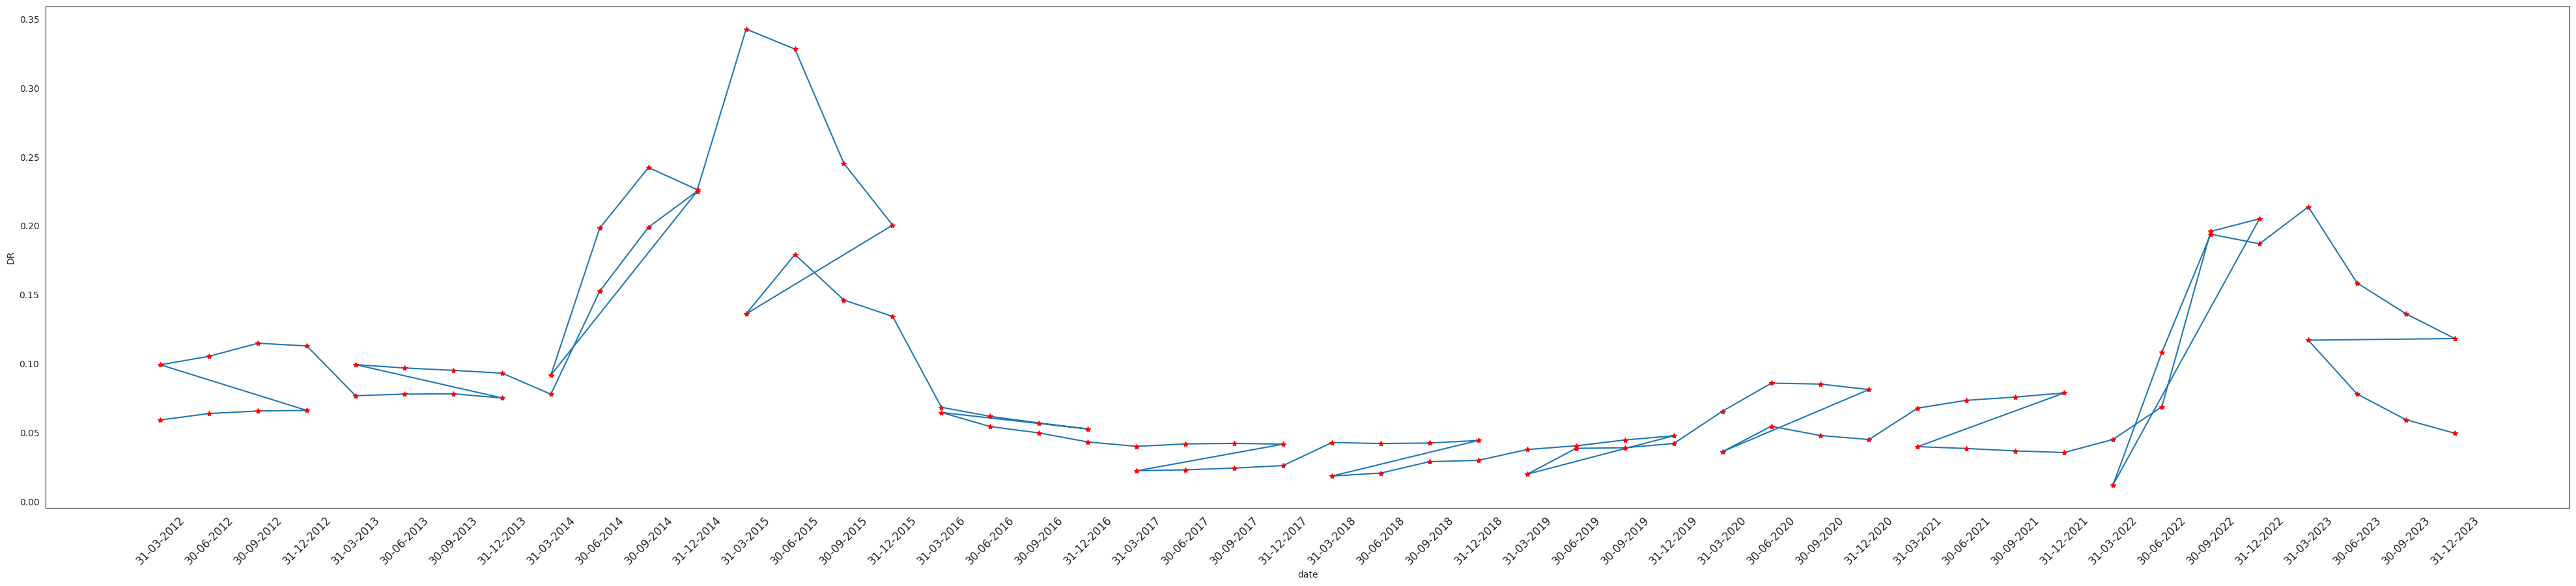

In [157]:
plt.figure(figsize  = (50, 10))
plt.plot(data2['hist_dat'], DR)
plt.xlabel('date')
plt.xticks(rotation = 45, fontsize = 12)
plt.ylabel('DR')

plt.plot(data2['hist_dat'], DR, 'r*')

plt.show()

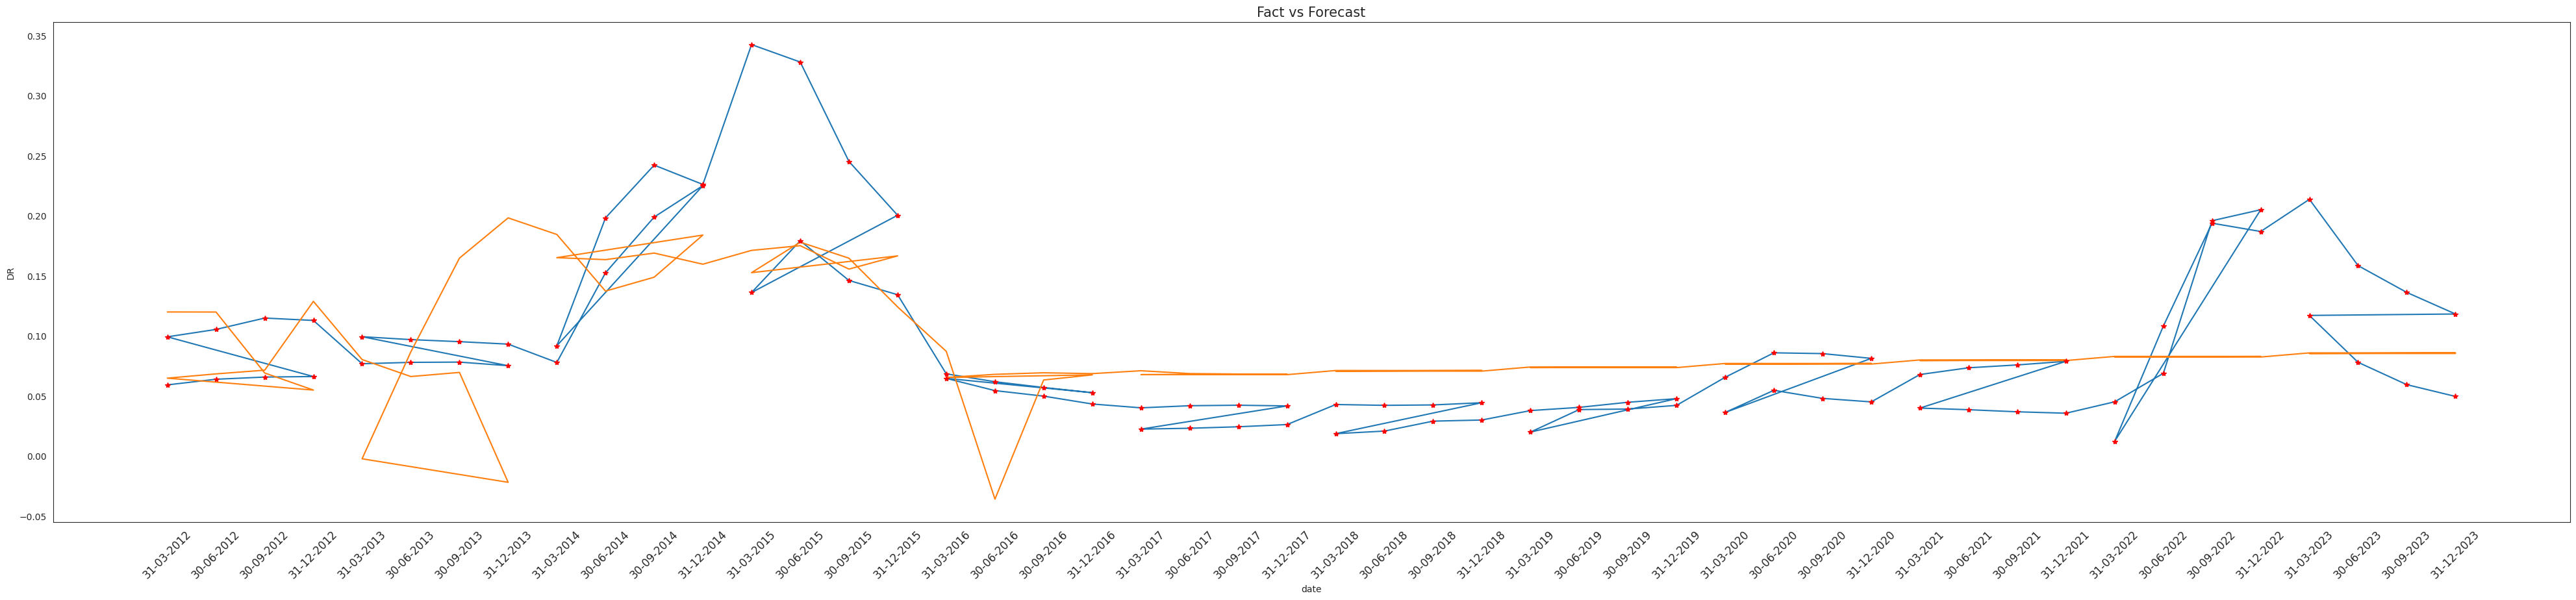

In [160]:
plt.figure(figsize  = (50, 10))
plt.plot(data2['hist_dat'], DR, label = "act DR")
plt.plot(data2['hist_dat'], Y_PRED, label = "predicted DR")

plt.xlabel('date')
plt.xticks(rotation = 45, fontsize = 12)
plt.ylabel('DR')
plt.title('Fact vs Forecast', fontsize = 16)

plt.plot(data2['hist_dat'], DR, 'r*')

plt.show()

In [ ]:
# load file with new data for macro parameters
# macro_new = ...
Y_New = LinReg.predict(macro_new)

In [52]:
# OSL Predictions
def analyse(x, y):
    model= sm.OLS(macro, DR)
    prediction = model.predict(macro)

SST = sum((DR- DR.mean())**2)
SSE = sum((DR- prediction)**2)
# SSR = sum((prediction - DR.mean())**2)
print(f"SST = {SST}")
# print(f"SSE = {SSE}")
# print(f"SSR = {SSR}")

NameError: name 'prediction' is not defined